In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import cartopy as cp
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs

In [2]:
radon_table = pd.read_csv('data_files\RadonNI.csv')

In [3]:
radon_table.head()

Tile  class       x       y
0  D1053      1  310500  453500
1  D1153      1  311500  453500
2  D1253      1  312500  453500
3  D0952      2  309500  452500
4  D1052      2  310500  452500

In [44]:
radon_table['class'].describe()

count    14720.000000
mean         2.682541
std          1.541938
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: class, dtype: float64

In [5]:
radon_table.tail(10)

Tile  class       x       y
14710  H9010      3  290500  310500
14711  H9110      3  291500  310500
14712  J2410      3  324500  310500
14713  J2510      3  325500  310500
14714  J2610      5  326500  310500
14715  J2710      5  327500  310500
14716  J2810      4  328500  310500
14717  J2910      4  329500  310500
14718  J2609      4  326500  309500
14719  J2709      4  327500  309500

In [6]:
radon_table.shape # 14720 rows and 4 columns

(14720, 4)

In [7]:
radon_table["class"]

0        1
1        1
2        1
3        2
4        2
        ..
14715    5
14716    4
14717    4
14718    4
14719    4
Name: class, Length: 14720, dtype: int64

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

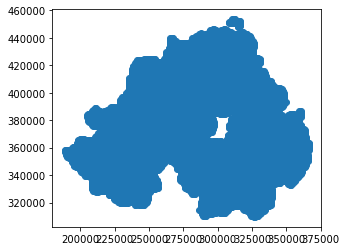

In [8]:
pts = [Point(row['x'], row['y']) for id, row in radon_table[['x', 'y']].iterrows()]
pts = gpd.GeoSeries(pts, crs='+init=epsg:29902')
pts.plot();
pts.crs

In [9]:
#pts.to_file('data_files/RadonNI.shp')

In [10]:
radon = gpd.read_file('data_files/RadonNI.shp') # load the radon shapefile

<AxesSubplot:>

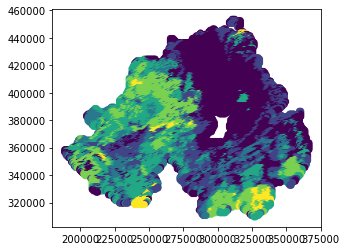

In [11]:
radon.plot('class')

<AxesSubplot:>

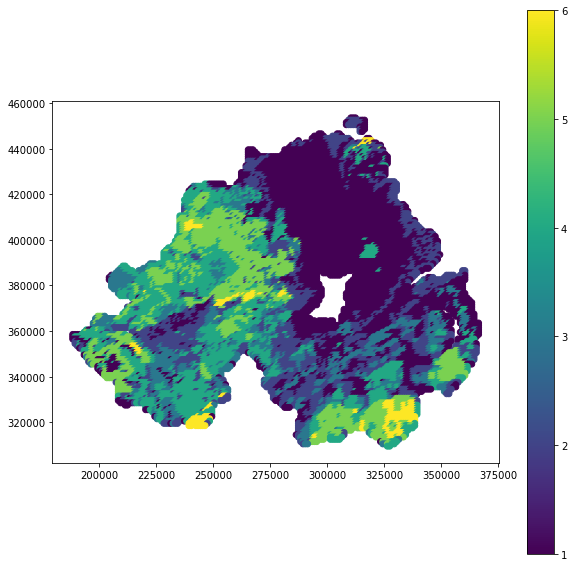

In [12]:
%matplotlib inline
radon.plot(column='class', cmap=None, legend=True, figsize=(10, 10))

In [13]:
#import matplotlib.pyplot as plt

#class = [1,2,3,4,5,6]

#my_labels = 'very low','low','low-moderate','moderate','high','very high',
#plt.pie(class,labels=my_labels,autopct='%1.1f%%')
#plt.title('Radon classes in Northern Ireland')
#plt.axis('equal')
#plt.show()

In [14]:
counties_orig = gpd.read_file('data_files/Counties.shp') # load the Counties shapefile

In [15]:
counties_orig.columns

Index(['COUNTY_ID', 'CountyName', 'Area_SqKM', 'OBJECTID', 'geometry'], dtype='object')

In [16]:
counties_orig.head()

COUNTY_ID   CountyName    Area_SqKM  OBJECTID  \
0          6       TYRONE  3265.796622         1   
1          1       ANTRIM  3097.847750         2   
2          2       ARMAGH  1327.228438         3   
3          4    FERMANAGH  1850.832538         4   
4          5  LONDONDERRY  2118.316853         5   

                                            geometry  
0  POLYGON ((-7.38177 54.94208, -7.38170 54.94201...  
1  MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54...  
2  POLYGON ((-6.35398 54.50927, -6.35191 54.50891...  
3  POLYGON ((-7.69417 54.60511, -7.69390 54.60498...  
4  POLYGON ((-6.66919 55.19899, -6.66918 55.19893...

In [17]:
counties_orig.head()

COUNTY_ID   CountyName    Area_SqKM  OBJECTID  \
0          6       TYRONE  3265.796622         1   
1          1       ANTRIM  3097.847750         2   
2          2       ARMAGH  1327.228438         3   
3          4    FERMANAGH  1850.832538         4   
4          5  LONDONDERRY  2118.316853         5   

                                            geometry  
0  POLYGON ((-7.38177 54.94208, -7.38170 54.94201...  
1  MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54...  
2  POLYGON ((-6.35398 54.50927, -6.35191 54.50891...  
3  POLYGON ((-7.69417 54.60511, -7.69390 54.60498...  
4  POLYGON ((-6.66919 55.19899, -6.66918 55.19893...

In [18]:
divisions = counties_orig['CountyName'].tolist() # Get a list of a particular column (Counties)
print(divisions)

['TYRONE', 'ANTRIM', 'ARMAGH', 'FERMANAGH', 'LONDONDERRY', 'DOWN']


<AxesSubplot:>

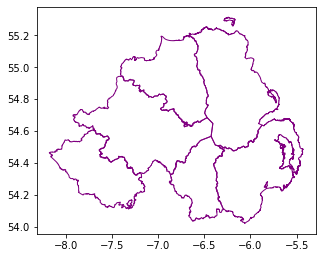

In [19]:
counties_orig.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

<AxesSubplot:>

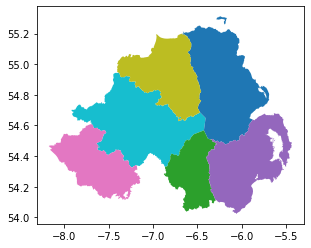

In [20]:
counties_orig.plot('CountyName')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


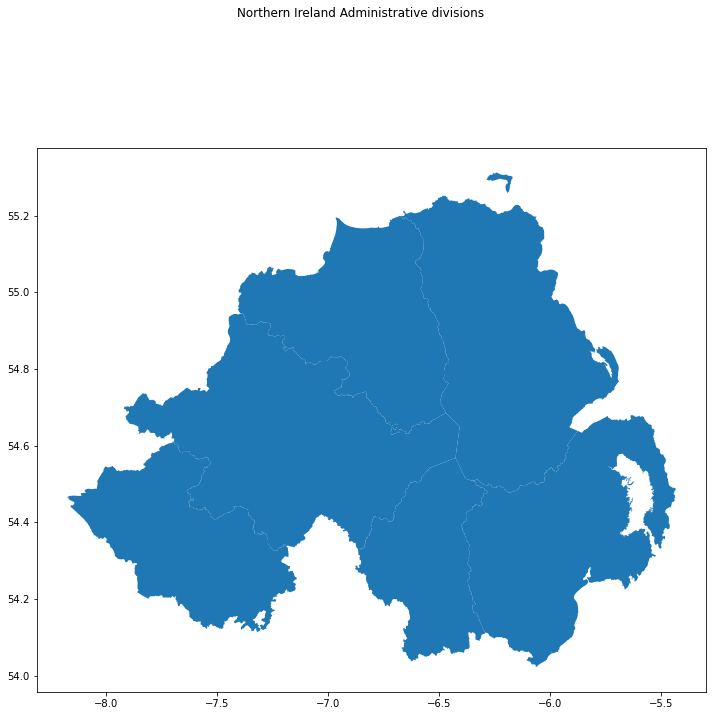

In [21]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = counties_orig.plot(axes=ax)
f.suptitle('Northern Ireland Administrative divisions')
plt.show('CountyName')

In [22]:
radon.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [23]:
counties_orig.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
counties = counties_orig.to_crs(epsg=29902)

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


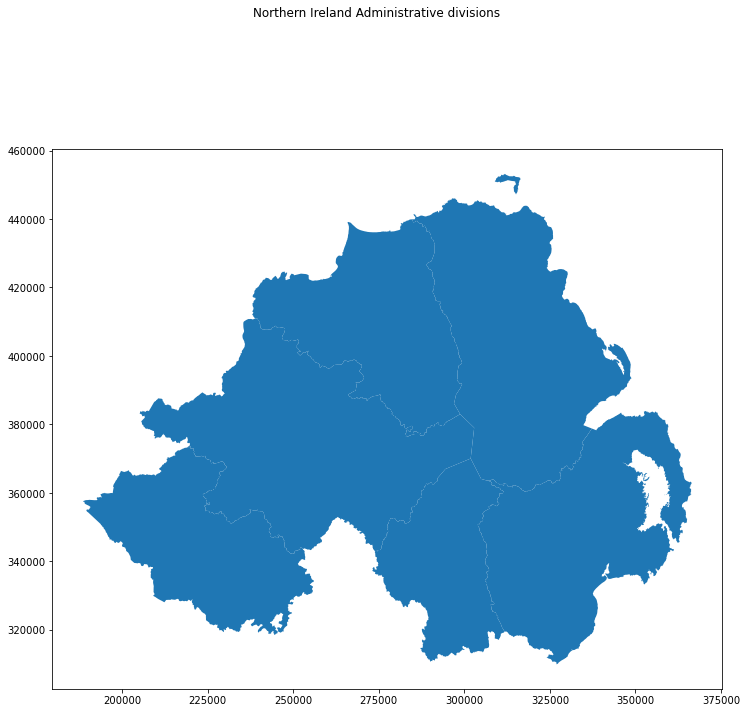

In [25]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = counties.plot(axes=ax)
f.suptitle('Northern Ireland Administrative divisions')
plt.show('CountyName')

# Note the difference in the X, Y values above.

In [26]:
print(radon.crs == counties.crs) 

True


In [27]:
radon_counties = gpd.sjoin(counties, radon, how='inner', lsuffix='left', rsuffix='right') 

In [28]:
radon_counties

COUNTY_ID CountyName    Area_SqKM  OBJECTID  \
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
..        ...        ...          ...       ...   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   

                                             geometry  index_right   Tile  \
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11267  H7546   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11268  H7646   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11109  H7647   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11723  H7343   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11724  H7443   
..                                                ...          ...    ...   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8630  J2662   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8631  J2762   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8612  J0862   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8445  J0863   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8444  J0763   

    class       x       y  
0       4  275500  346500  
0       3  276500  346500  
0       2  276500  347500  
0       3  273500  343500  
0       3  274500  343500  
..    ...     ...     ...  
5       1  326500  362500  
5       1  327500  362500  
5       3  308500  362500  
5       1  308500  363500  
5       1  307500  363500  

[13855 rows x 10 columns]

In [29]:
radon_counties.shape

(13855, 10)

In [30]:
radon_counties.info() #summary

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13855 entries, 0 to 5
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   COUNTY_ID    13855 non-null  int64   
 1   CountyName   13855 non-null  object  
 2   Area_SqKM    13855 non-null  float64 
 3   OBJECTID     13855 non-null  int64   
 4   geometry     13855 non-null  geometry
 5   index_right  13855 non-null  int64   
 6   Tile         13855 non-null  object  
 7   class        13855 non-null  int64   
 8   x            13855 non-null  int64   
 9   y            13855 non-null  int64   
dtypes: float64(1), geometry(1), int64(6), object(2)
memory usage: 1.2+ MB


C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


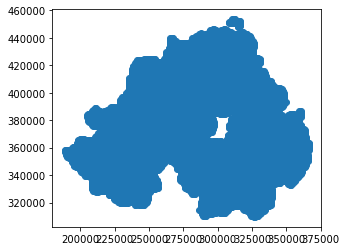

In [31]:
radon_counties = [Point(row['x'], row['y']) for id, row in radon_table[['x', 'y']].iterrows()]
radon_counties = gpd.GeoSeries(pts, crs='+init=epsg:29902')
radon_counties.plot();

In [32]:
#radon_counties.to_file('data_files/radon_counties.shp')

In [33]:
radon_counties = gpd.read_file('data_files/radon_counties.shp') # load the radon-counties shapefile

In [34]:
radon_counties

Tile  class       x       y  COUNTY_ID CountyName    Area_SqKM  \
0      C3610      4  236500  410500        6.0     TYRONE  3265.796622   
1      C3710      4  237500  410500        6.0     TYRONE  3265.796622   
2      C3810      4  238500  410500        6.0     TYRONE  3265.796622   
3      C3910      4  239500  410500        6.0     TYRONE  3265.796622   
4      C3509      4  235500  409500        6.0     TYRONE  3265.796622   
...      ...    ...     ...     ...        ...        ...          ...   
14715  J2610      5  326500  310500        NaN       None          NaN   
14716  J2810      4  328500  310500        NaN       None          NaN   
14717  J2910      4  329500  310500        NaN       None          NaN   
14718  J2609      4  326500  309500        NaN       None          NaN   
14719  J2709      4  327500  309500        NaN       None          NaN   

       OBJECTID                       geometry  
0           1.0  POINT (236500.000 410500.000)  
1           1.0  POINT (237500.000 410500.000)  
2           1.0  POINT (238500.000 410500.000)  
3           1.0  POINT (239500.000 410500.000)  
4           1.0  POINT (235500.000 409500.000)  
...         ...                            ...  
14715       NaN  POINT (326500.000 310500.000)  
14716       NaN  POINT (328500.000 310500.000)  
14717       NaN  POINT (329500.000 310500.000)  
14718       NaN  POINT (326500.000 309500.000)  
14719       NaN  POINT (327500.000 309500.000)  

[14720 rows x 9 columns]

In [35]:
print(radon_counties.groupby(['CountyName', 'class'])['class'].count()) # summarize the radon distribution by CountyName

CountyName   class
ANTRIM       1        2448
             2         397
             3           7
             4          96
             5           1
             6          11
ARMAGH       1         327
             2         434
             3         283
             4         103
             5         138
             6           3
DOWN         1         656
             2         568
             3         501
             4         331
             5         300
             6         139
FERMANAGH    1         113
             2         273
             3         349
             4         745
             5         305
             6          39
LONDONDERRY  1         964
             2         241
             3         174
             4         303
             5         422
TYRONE       1         191
             2         518
             3         407
             4        1156
             5         836
             6          76
Name: class, dtype: int64


In [36]:
print(radon_counties.groupby(['CountyName'])['class'].mean())

CountyName
ANTRIM         1.256081
ARMAGH         2.456522
DOWN           2.786774
FERMANAGH      3.533443
LONDONDERRY    2.514259
TYRONE         3.677136
Name: class, dtype: float64


In [37]:
print(radon_counties.groupby(['CountyName'])['Area_SqKM'].mean())

CountyName
ANTRIM         3097.847750
ARMAGH         1327.228438
DOWN           2491.238606
FERMANAGH      1850.832538
LONDONDERRY    2118.316853
TYRONE         3265.796622
Name: Area_SqKM, dtype: float64


In [38]:
county_tyrone = radon_counties[radon_counties.CountyName == "TYRONE"]
len(county_tyrone) # returns the number of radon data (data count) in county down

3184

In [39]:
county_tyrone

Tile  class       x       y  COUNTY_ID CountyName    Area_SqKM  \
0     C3610      4  236500  410500        6.0     TYRONE  3265.796622   
1     C3710      4  237500  410500        6.0     TYRONE  3265.796622   
2     C3810      4  238500  410500        6.0     TYRONE  3265.796622   
3     C3910      4  239500  410500        6.0     TYRONE  3265.796622   
4     C3509      4  235500  409500        6.0     TYRONE  3265.796622   
...     ...    ...     ...     ...        ...        ...          ...   
3179  H5143      4  251500  343500        6.0     TYRONE  3265.796622   
3180  H5443      4  254500  343500        6.0     TYRONE  3265.796622   
3181  H7343      3  273500  343500        6.0     TYRONE  3265.796622   
3182  H7443      3  274500  343500        6.0     TYRONE  3265.796622   
3183  H4942      4  249500  342500        6.0     TYRONE  3265.796622   

      OBJECTID                       geometry  
0          1.0  POINT (236500.000 410500.000)  
1          1.0  POINT (237500.000 410500.000)  
2          1.0  POINT (238500.000 410500.000)  
3          1.0  POINT (239500.000 410500.000)  
4          1.0  POINT (235500.000 409500.000)  
...        ...                            ...  
3179       1.0  POINT (251500.000 343500.000)  
3180       1.0  POINT (254500.000 343500.000)  
3181       1.0  POINT (273500.000 343500.000)  
3182       1.0  POINT (274500.000 343500.000)  
3183       1.0  POINT (249500.000 342500.000)  

[3184 rows x 9 columns]

<AxesSubplot:>

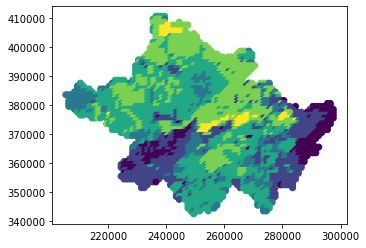

In [40]:
county_tyrone.plot('class')

In [41]:
county_tyrone.loc[[county_down["class"].idxmax(), county_down["class"].idxmin()]]

NameError: name 'county_down' is not defined

In [ ]:
print(county_tyrone.groupby(['class'])['class'].count()) # summarize the radon distribution by CountyName

In [ ]:
tyrone_class_count = county_tyrone.groupby(['class'])['class'].count() # obtain the counts of each class in County Down
tyrone_class_count

In [ ]:
tyrone_class_percent = (county_tyrone.groupby(['class'])['class'].count() * 100 / 3265.796622) # summarize the radon distribution by CountyName
tyrone_class_percent

In [ ]:
ax = tyrone_class_percent.plot.bar(x='lab', y='val', rot=0)

In [ ]:
#repeat the column chart for all the counties or find a way to run this in one code.